In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import shutil
import cv2
from tqdm import tqdm

import wave
import pylab
from pathlib import Path
from scipy import signal
from scipy.io import wavfile
from sklearn.metrics import confusion_matrix
import itertools

INPUT_DIR = '/content/gdrive/MyDrive/data/vox1_test_wav/wav/'
OUTPUT_DIR = '/content/gdrive/MyDrive/mfcc'

from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.layers import Add, Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D , Dropout , Concatenate, Reshape , Lambda
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils import np_utils

from keras.callbacks import ModelCheckpoint
from keras.initializers import glorot_uniform
from keras import backend as K

from keras.applications.vgg16 import VGG16

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Declare constants
IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128
BATCH_SIZE = 64
N_CHANNELS = 3
N_CLASSES = 20
IMG_SHAPE = (IMAGE_HEIGHT,IMAGE_WIDTH,N_CHANNELS)

AUD_HEIGHT = 128
AUD_WIDTH = 128


In [ ]:
# # Utility function to get sound and frame rate info
# def get_wav_info(wav_file):
#     wav = wave.open(wav_file, 'r')
#     frames = wav.readframes(-1)
#     sound_info = pylab.frombuffer(frames, 'int16')
#     frame_rate = wav.getframerate()
#     wav.close()
#     return sound_info, frame_rate

# # For every recording, make a spectogram and save it as label_speaker_no.png
# if not os.path.exists(os.path.join(OUTPUT_DIR, 'audio-images')):
#     os.mkdir(os.path.join(OUTPUT_DIR, 'audio-images'))
# for x in os.listdir('/content/gdrive/MyDrive/data/vox1_test_wav/wav'):
#   Main_INPUT_DIR='/content/gdrive/MyDrive/data/vox1_test_wav/wav/'+x
#   for INPUT_DIR in os.listdir(Main_INPUT_DIR):
#     temp='/content/gdrive/MyDrive/data/vox1_test_wav/wav/'+x+'/'+ INPUT_DIR
#     print(INPUT_DIR)
#     for filename in os.listdir(temp):
#         print(filename)
#         if "wav" in filename:
#             file_path = os.path.join(temp, filename)
#             file_stem = Path(file_path).stem
#             target_dir = str(x)
#             dist_dir = os.path.join(os.path.join(OUTPUT_DIR, 'audio-images'), target_dir)
#             file_dist_path = os.path.join(dist_dir, file_stem)
#             if not os.path.exists(file_dist_path + '.png'):
#                 if not os.path.exists(dist_dir):
#                     os.mkdir(dist_dir)
#                 file_stem = Path(file_path).stem
#                 sound_info, frame_rate = get_wav_info(file_path)
#                 pylab.specgram(sound_info, Fs=frame_rate)
                
#                 pylab.savefig(f'{file_dist_path}'+str(os.listdir(Main_INPUT_DIR).index(INPUT_DIR))+'.png')
#                 pylab.close()

# # Print the ten classes in our dataset
# path_list = os.listdir(os.path.join(OUTPUT_DIR, 'audio-images'))
# print("Classes: \n")

In [5]:
# # Creating training data
# # dont run this
# main_dir = '/content/gdrive/My Drive'
# data_dir = main_dir + '/faces20/'
# categories = os.listdir(main_dir + '/faces20')
# data = []
# categorical_index = []
# def create_face_data():
#   for category in categories:
#     path = os.path.join(data_dir+category)
#     class_num = categories.index(category)
#     categorical_index.append([category,class_num])
#     for img in tqdm(os.listdir(path)):
#       try:
#         img_array_bgr = cv2.imread(os.path.join(path,img))
#         img_array = cv2.cvtColor(img_array_bgr , cv2.COLOR_BGR2RGB)
#         new_array = cv2.resize(img_array , (IMAGE_HEIGHT,IMAGE_WIDTH))
#         data.append([new_array,class_num])
#       except Exception as e:
#         pass

# create_face_data()

100%|██████████| 27/27 [00:14<00:00,  1.89it/s]


In [ ]:
# len(data)

653

In [6]:
# main_dir1 = '/content/gdrive/My Drive'
# data_dir1 = main_dir1 + '/t3/audio-images/'
# categories1 = os.listdir(main_dir1 + '/t3/audio-images')
# data1 = []
# categorical_index1 = []
# def create_audio_data():
#   for category in categories1:
#     path = os.path.join(data_dir1+category)
#     class_num = categories1.index(category)
#     categorical_index1.append([category,class_num])
#     for img in tqdm(os.listdir(path)):
#       try:
#         img_array_bgr = cv2.imread(os.path.join(path,img))
#         img_array = cv2.cvtColor(img_array_bgr , cv2.COLOR_BGR2RGB)
#         new_array = cv2.resize(img_array , (IMAGE_HEIGHT,IMAGE_WIDTH))
#         data1.append([new_array,class_num])
#       except Exception as e:
#         pass

# create_audio_data()

100%|██████████| 163/163 [01:04<00:00,  2.52it/s]


In [21]:
# len(data1)

2139

In [7]:
# # dont run this
# import random

# random.seed(33)
# random.shuffle(data)

In [8]:
# # creating X and y from data list

# X = []
# y = []

# for features, labels in data:
#   X.append(features)
#   y.append(labels)

# # converting into numpy arrays
# X = np.array(X).reshape(-1,IMAGE_HEIGHT,IMAGE_WIDTH,3)
# y = np.array(y)

In [9]:
# random.seed(33)
# random.shuffle(data1)

In [10]:
# # creating X and y from data list

# X1 = []
# y1 = []

# for features, labels in data1:
#   X1.append(features)
#   y1.append(labels)

# # converting into numpy arrays
# X1 = np.array(X1).reshape(-1,IMAGE_HEIGHT,IMAGE_WIDTH,3)
# y1 = np.array(y1)

In [11]:
# import pickle
# op_path='/content/gdrive/My Drive/data/multimodal_data1/'

In [5]:
import pickle
op_path='/content/gdrive/My Drive/data/multimodal_data1/'

def save_pickle(op_path,var,name):
    pickle_out = open(op_path+name+'.pickle' , 'wb')
    pickle.dump(var , pickle_out)
    pickle_out.close()

def load_pickle(op_path,name):
    pickle_in = open(op_path+name+'.pickle' , 'rb')
    var = pickle.load(pickle_in)
    return var

In [13]:
# save_pickle(op_path,X,'X')
# save_pickle(op_path,y,'y')
# save_pickle(op_path,X1,'X1')
# save_pickle(op_path,y1,'y1')

In [6]:
X=load_pickle(op_path,'X')
y=load_pickle(op_path,'y')
X1=load_pickle(op_path,'X1')
y1=load_pickle(op_path,'y1')

In [15]:
# # creating train test split data

# from sklearn.model_selection import train_test_split

# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

# print('Shape of X_train:' + str(X_train.shape))
# print('Shape of y_train:' + str(y_train.shape))
# print('Shape of X_test:' + str(X_test.shape))
# print('Shape of y_test:' + str(y_test.shape))

Shape of X_train:(587, 128, 128, 3)
Shape of y_train:(587,)
Shape of X_test:(66, 128, 128, 3)
Shape of y_test:(66,)


In [16]:
# save_pickle(op_path,X_train,'X_train')
# save_pickle(op_path,y_train,'y_train')
# save_pickle(op_path,X_test,'X_test')
# save_pickle(op_path,y_test,'y_test')

In [8]:
X_train=load_pickle(op_path,'X_train')
y_train=load_pickle(op_path,'y_train')
X_test=load_pickle(op_path,'X_test')
y_test=load_pickle(op_path,'y_test')

In [18]:
# # creating train test split for audio data

# from sklearn.model_selection import train_test_split

# X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.1)

# print('Shape of X1_train:' + str(X1_train.shape))
# print('Shape of y1_train:' + str(y1_train.shape))
# print('Shape of X1_test:' + str(X1_test.shape))
# print('Shape of y1_test:' + str(y1_test.shape))

Shape of X1_train:(1925, 128, 128, 3)
Shape of y1_train:(1925,)
Shape of X1_test:(214, 128, 128, 3)
Shape of y1_test:(214,)


In [19]:
# save_pickle(op_path,X1_train,'X1_train')
# save_pickle(op_path,y1_train,'y1_train')
# save_pickle(op_path,X1_test,'X1_test')
# save_pickle(op_path,y1_test,'y1_test')

In [7]:
X1_train=load_pickle(op_path,'X1_train')
y1_train=load_pickle(op_path,'y1_train')
X1_test=load_pickle(op_path,'X1_test')
y1_test=load_pickle(op_path,'y1_test')

In [8]:
import random

In [9]:
def create_same_class_pairs(X,y,xyz,img_a,img_b,img_y,same_class_list,num):

  i = 0
  while(i<num):
    
    # perform pairing for same classes.
    if xyz == 0 :
      same_class = np.random.randint(N_CLASSES)
      same_class_list.append(same_class)

    if xyz == 1 :
      same_class= same_class_list[i]
    '''
    0, img1, img2,          ya
    ..
    235 .................... ysom
    index = [0,235]
    ysame = y

    x_random[0] = X[0]
    x_random[1] = X[235]


    imga = [arr,arr] img_b = [arr2 , arr2] img_y = [clas1 , clas2]
    '''
    enum_list=[k for k,j in enumerate(y) if j==same_class]
    # print(len(enum_list))
    if len(enum_list) >= 2:
      index = random.sample( enum_list, 2) 
      x_random = X[index]
      y_same = same_class

      img_a.append(x_random[0]) # these are indexes in X_train
      img_b.append(x_random[1])

      img_y.append(y_same) # this is the class

      i = i+1

  return img_a,img_b,img_y

In [10]:
def create_diff_class_pairs(X,y,xyz,img_a,img_b,img_y,num):

  i = 0
  while(i<num):
    # Repeat this as many times as many examples you want using a loop

    # select random indices from the shape[0] of the X_train array
    index = np.random.choice(X.shape[0], 2, replace=False)  

    # make a random array by choosing subsets from X_train
    x_random = X[index]
    y_random = y[index]

    # append the first image to img_a and second to img_b

    # finally based on the similarity of the images based on their classes append either the class (if they are similar) or -1 if they are dissimilar
    if(y_random[0] == y_random[1]):
      pass
    else:
      img_a.append(x_random[0])
      img_b.append(x_random[1])

      img_y.append(-1)

      i=i+1
    
  return img_a,img_b,img_y

In [11]:

def create_data_pairs(X,y,xyz):
  img_a = []
  img_b = []  
  img_y = []
  
  # our objective is to make half of the dataset with the same classes and half with different classes.

  # same class
  img_a,img_b,img_y = create_same_class_pairs(X,y,xyz,img_a,img_b,img_y,same_class_list,3000)

  # different classes
  img_a,img_b,img_y = create_diff_class_pairs(X,y,xyz,img_a,img_b,img_y,3000)

  if xyz==0 :
    img_a,img_b,img_y = create_same_class_pairs(X,y,xyz,img_a,img_b,img_y,same_class_list1,3000)
    img_a,img_b,img_y = create_diff_class_pairs(X,y,xyz,img_a,img_b,img_y,3000)
  else :
    img_a,img_b,img_y = create_diff_class_pairs(X,y,xyz,img_a,img_b,img_y,3000)
    img_a,img_b,img_y = create_same_class_pairs(X,y,xyz,img_a,img_b,img_y,same_class_list1,3000)

  return img_a,img_b,img_y

In [12]:
# create the final data to be fed into the siamese network for training

def multimodal_data_generate(X_data , y_data , X1_data , y1_data):

  print(len(X_data))
  print(len(y_data))
  img_a , img_b , img_y = create_data_pairs(X_data,y_data,0)
  print(same_class_list)
  aud_a , aud_b , aud_y = create_data_pairs(X1_data,y1_data,1)
  print(same_class_list1)

  labels = []

  for i in range(len(img_a)):
    if(img_y[i]==-1 or aud_y[i] == -1): # image mismatch audio mismatch and both mismatch
      labels.append(0)
    elif(img_y[i]==aud_y[i]):
      labels.append(1)
    else:
      labels.append(0)
  
  print(img_y)
  print(aud_y)
  print(labels)
  return img_a,aud_a,img_b,aud_b,labels   

In [43]:
same_class_list = []
same_class_list1 = [] # to define the same list of classes
img_a,aud_a,img_b,aud_b,labels  = multimodal_data_generate(X_train , y_train , X1_train , y1_train)

587
587
[18, 4, 2, 14, 0, 3, 19, 11, 3, 9, 13, 1, 14, 3, 12, 2, 10, 0, 13, 9, 14, 3, 8, 5, 13, 3, 6, 9, 17, 18, 5, 12, 16, 9, 0, 14, 9, 7, 12, 8, 14, 7, 0, 9, 15, 8, 0, 9, 17, 12, 6, 2, 6, 6, 18, 19, 5, 5, 3, 0, 10, 13, 4, 7, 9, 17, 12, 11, 7, 12, 1, 7, 18, 7, 9, 17, 1, 5, 1, 8, 12, 10, 10, 6, 2, 4, 5, 16, 9, 3, 4, 13, 16, 6, 8, 14, 5, 18, 15, 9, 18, 19, 12, 12, 8, 12, 6, 13, 19, 17, 11, 11, 3, 6, 13, 8, 16, 1, 12, 9, 8, 17, 4, 14, 8, 10, 8, 17, 5, 11, 12, 11, 12, 12, 4, 3, 19, 9, 12, 2, 19, 3, 19, 10, 14, 7, 11, 6, 2, 2, 3, 14, 0, 2, 13, 15, 1, 2, 1, 2, 7, 1, 15, 12, 13, 12, 3, 4, 10, 13, 13, 1, 7, 17, 1, 15, 0, 17, 5, 1, 0, 10, 6, 8, 10, 13, 9, 18, 2, 0, 5, 17, 5, 13, 5, 11, 4, 5, 10, 14, 12, 1, 10, 12, 0, 5, 7, 6, 14, 3, 18, 12, 17, 6, 16, 12, 19, 3, 19, 4, 12, 1, 12, 9, 4, 14, 4, 7, 4, 10, 2, 4, 7, 0, 4, 6, 13, 8, 9, 15, 9, 13, 13, 18, 11, 3, 10, 15, 7, 8, 10, 0, 4, 18, 15, 3, 16, 19, 2, 13, 4, 5, 13, 18, 6, 14, 9, 7, 13, 13, 13, 3, 14, 19, 10, 16, 10, 15, 11, 12, 12, 18, 11, 10, 1

In [16]:
len(img_a)

16000

In [17]:
len(same_class_list1)

4000

In [ ]:
# save_pickle(op_path,img_a,'pairs/pair1/img_a')
# save_pickle(op_path,img_b,'pairs/pair1/img_b')
# save_pickle(op_path,aud_a,'pairs/pair1/aud_a')
# save_pickle(op_path,aud_b,'pairs/pair1/aud_b')
# save_pickle(op_path,labels,'pairs/pair1/labels')

In [ ]:
# img_a=load_pickle(op_path,'pairs/pair1/img_a')
# img_b=load_pickle(op_path,'pairs/pair1/img_b')
# aud_a=load_pickle(op_path,'pairs/pair1/aud_a')
# aud_b=load_pickle(op_path,'pairs/pair1/aud_b')
# labels=load_pickle(op_path,'pairs/pair1/labels')

In [13]:
# create the individual networks for image and audio to get the feature encodings
def image_feat_network(input_dim_img):
  base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

  base_model.trainable = False
  # base_model.summary()

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Input(shape=IMG_SHAPE))
  model.add(base_model)
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(128, activation='relu',kernel_regularizer='l2'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))
  # model.name = 'Image Model'
  return model



def audio_feat_network(input_dim_aud):

  IMAGE_HEIGHT , IMAGE_WIDTH , N_CHANNELS = input_dim_aud # input shape

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))
  model.add(tf.keras.layers.Conv2D(32, 3, strides=2, padding='same', activation='relu'))
  #model.add(tf.keras.layers.Dropout(0.005))
  #model.add(tf.keras.layers.BatchNormalization())

  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  #model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
  #model.add(tf.keras.layers.BatchNormalization())
  #model.add(tf.keras.layers.Dropout(0.01))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  #model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
  #model.add(tf.keras.layers.BatchNormalization())
  #model.add(tf.keras.layers.Dropout(0.05))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  #model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(256, 3, padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256, activation='relu'))
  #model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(64, activation='relu'))
  #model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))
  # model.name = 'Audio Model'
  return model


# multimodal network

def multimodal_network(input_dim):

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Input(shape = input_dim))
  model.add(tf.keras.layers.Dense(128 , activation = 'relu'))
  model.add(tf.keras.layers.Dropout(0.1))
  # model.add(tf.keras.layers.Dense(64 , activation = 'relu'))
  # model.add(tf.keras.layers.Dropout(0.1))
  model.add(tf.keras.layers.Dense(20 , activation = 'relu'))

  # model.summary()
  # model.name = 'multimodal model'
  return model

In [14]:
# siamese network model which helps in one-shot learning

def siamese_network(input_dim_img,input_dim_aud):
    
    img_a = Input(shape=input_dim_img)
    img_b = Input(shape=input_dim_img)
    aud_a = Input(shape=input_dim_aud)
    aud_b = Input(shape=input_dim_aud)

    # extracting the image embeddings from the image network for two input images
    
    img_network = image_feat_network(input_dim_img)
    
    img_network.load_weights('/content/gdrive/MyDrive/Face Detection/faces20/model7-usingVGG/checkpoint-47.hdf5')

    img_network = Model(inputs = img_network.input , outputs = img_network.layers[-2].output)
    
    feat_img_a = img_network(img_a)
    feat_img_b = img_network(img_b)
    
    # extracting the audio embeddings from the image network for two output images

    aud_network = audio_feat_network(input_dim_aud)
    
    aud_network.load_weights('/content/gdrive/MyDrive/tmp/check 20/weights.54-0.90.hdf5')

    aud_network = Model(inputs = aud_network.input , outputs = aud_network.layers[-2].output)

    feat_aud_a = aud_network(aud_a)
    feat_aud_b = aud_network(aud_b)
     

    # concatenate the first image's embeddings with the first audio's embeddings
    concat_a = Concatenate(axis=1)([feat_img_a, feat_aud_a])

    # concatenate the second image's embeddings with the second audio's embeddings
    concat_b = Concatenate(axis=1)([feat_img_b, feat_aud_b])

    input_dim = concat_a.shape[1] # (?) put the input dimensions here

    base_network = multimodal_network(input_dim)
    
    # left vector encodings
    encoded_l = base_network(concat_a) 
    # right vector encodings
    encoded_r = base_network(concat_b)

    # Layer to merge two encoded inputs with the l1 distance between them
    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))

    # Get the L1 Distance between the two encoded legs and predict a sigmoid using that.
    L1_distance = L1_layer([encoded_l, encoded_r])
    prediction = Dense(1,activation='sigmoid')(L1_distance)

    model = Model(inputs=[img_a, aud_a, img_b,aud_b], outputs=prediction)

    optimizer = Adam(lr=1e-5, beta_1=0.9, beta_2=0.999)
    model.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=['accuracy'])

    return optimizer , model



In [29]:
temp = list(zip(img_a,aud_a,img_b,aud_b,labels)) 
random.shuffle(temp) 
img_a,aud_a,img_b,aud_b,labels = zip(*temp)

In [30]:
len(img_a)

16000

In [15]:
input_dim_img = (IMAGE_HEIGHT,IMAGE_WIDTH,N_CHANNELS)
input_dim_aud = (AUD_HEIGHT,AUD_WIDTH,N_CHANNELS)

# final model train 
optimizer , model = siamese_network(input_dim_img , input_dim_aud)
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 128, 128, 3) 0                                            
____________________________________________________________________________________________

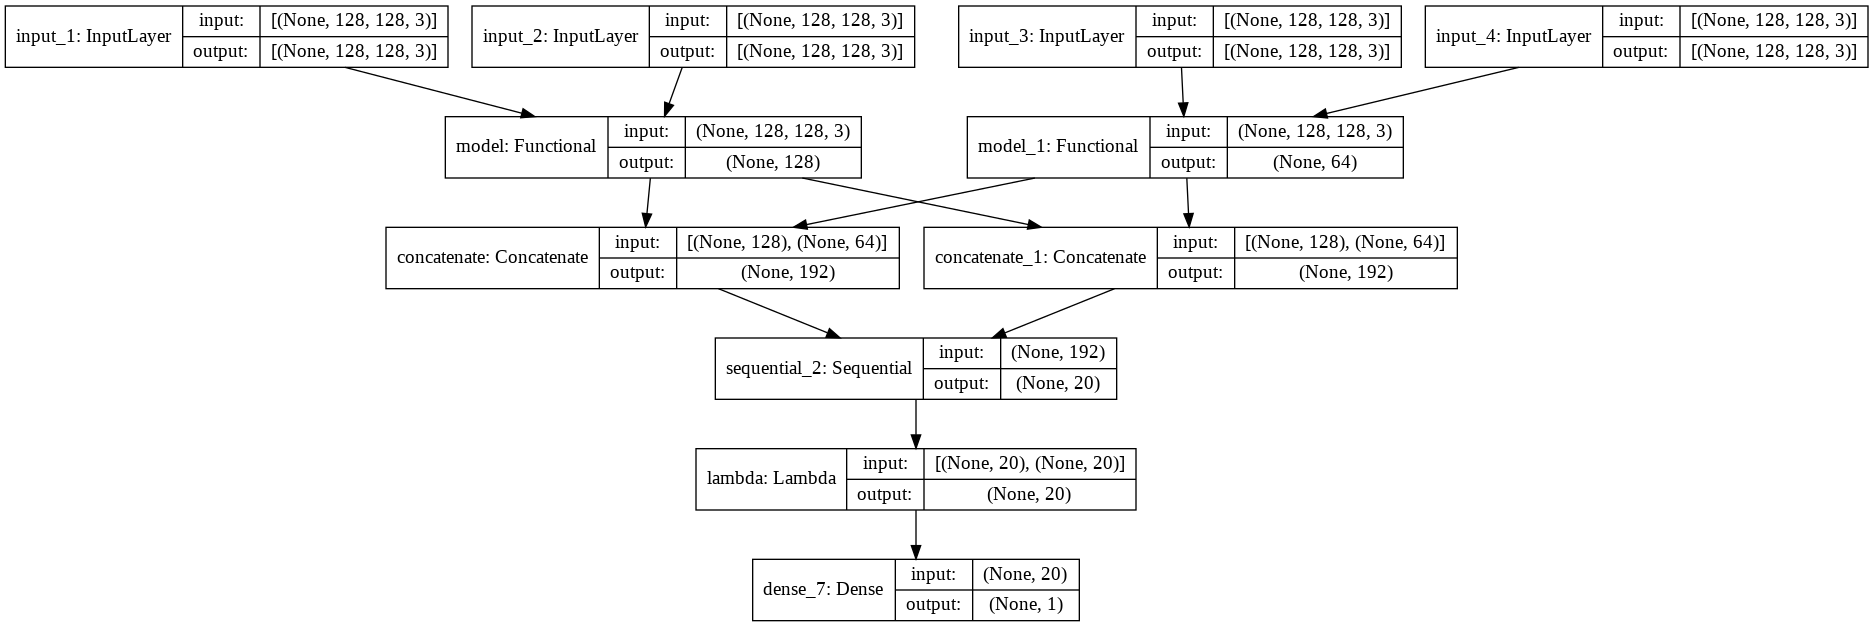

In [16]:
keras.utils.plot_model(model, "Multimodal Human Verification Model.png", show_shapes=True)

In [33]:
np.asarray(img_a).shape

(16000, 128, 128, 3)

In [ ]:
# model.load_weights('/content/gdrive/MyDrive/final_pred/model1/checkpoint-49.hdf5')

ValueError: ignored

In [ ]:
# model.load_weights('/content/gdrive/MyDrive/final_pred/model2/checkpoint-03.hdf5')

In [ ]:
# model.load_weights('/content/gdrive/MyDrive/final_pred/model3/checkpoint-30.hdf5')

In [17]:
model.load_weights('/content/gdrive/MyDrive/final_pred/modeli=4000-1/checkpoint-13.hdf5')

In [ ]:

weight_dir = "/content/gdrive/My Drive/final_pred/modeli=4000-1"
if not os.path.exists(weight_dir):
    os.mkdir(weight_dir)
    
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=weight_dir+'/checkpoint-{epoch:02d}.hdf5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [26]:
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
model.fit([np.asarray(img_a),np.asarray(aud_a),np.asarray(img_b),np.asarray(aud_b)], np.asarray(labels) ,validation_split=0.2, batch_size = BATCH_SIZE , verbose = 1, epochs = 30 , callbacks = checkpoint)

Epoch 1/30
200/200 [==============================] - 47s 235ms/step - loss: 0.7277 - accuracy: 0.7357 - val_loss: 0.6954 - val_accuracy: 0.7544
Epoch 2/30
200/200 [==============================] - 46s 227ms/step - loss: 0.7264 - accuracy: 0.7323 - val_loss: 0.6940 - val_accuracy: 0.7519
Epoch 3/30
200/200 [==============================] - 46s 230ms/step - loss: 0.7226 - accuracy: 0.7355 - val_loss: 0.6890 - val_accuracy: 0.7525
Epoch 4/30
200/200 [==============================] - 45s 226ms/step - loss: 0.7194 - accuracy: 0.7353 - val_loss: 0.6861 - val_accuracy: 0.7541
Epoch 5/30
200/200 [==============================] - 46s 228ms/step - loss: 0.7174 - accuracy: 0.7362 - val_loss: 0.6828 - val_accuracy: 0.7547
Epoch 6/30
200/200 [==============================] - 46s 230ms/step - loss: 0.7113 - accuracy: 0.7366 - val_loss: 0.6796 - val_accuracy: 0.7538
Epoch 7/30
200/200 [==============================] - 46s 230ms/step - loss: 0.7057 - accuracy: 0.7398 - val_loss: 0.6789 - val_ac

KeyboardInterrupt: ignored

In [ ]:
# tf.reset_default_graph()
# faceModel = get_face_model()
# faceModel.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [35]:
import random

In [36]:
print(len(X_train))
print(len(y_train))
print(len(X1_train))
print(len(y1_train))

587
587
1925
1925


In [37]:
print(len(X_test))
print(len(y_test))
print(len(X1_test))
print(len(y1_test))

66
66
214
214


In [ ]:
same_class_list = []
same_class_list1=[]
def testing():
  
  img_test_left , aud_test_left , img_test_right , aud_test_right , labels_test = multimodal_data_generate(X_test , y_test , X1_test , y1_test) # necessary lists of test images and audio

  temp = list(zip(img_test_left,aud_test_left,img_test_right,aud_test_right,labels_test)) 
  random.shuffle(temp) 
  img_test_left,aud_test_left,img_test_right,aud_test_right,labels_test = zip(*temp)

  results = model.evaluate([np.asarray(img_test_left),np.asarray(aud_test_left),np.asarray(img_test_right),np.asarray(aud_test_right)], np.asarray(labels_test) , batch_size = BATCH_SIZE)

  print('Test Loss: '+str(results[0]))
  print('Test Accuracy: '+str(results[1]))

testing()

66
66


In [21]:
import matplotlib.pyplot as plt

In [22]:
def image_processing(path,xyz):

  array_bgr = cv2.imread(path)
  array = cv2.cvtColor(array_bgr , cv2.COLOR_BGR2RGB)
  img= cv2.resize(array , (IMAGE_HEIGHT,IMAGE_WIDTH))
  img= np.array(img).reshape(-1,IMAGE_HEIGHT,IMAGE_WIDTH,3)
  if xyz==1:
    plt.imshow(array)
    plt.show()
  return img

In [43]:
# function to take the image and audio of two persons and verify whether they are the same person or not...

def one_shot_learning_task():

  person1_aud=image_processing('/content/gdrive/MyDrive/t3/extra 15 again/id10304/0000110.png',0)

  person1_img=image_processing('/content/gdrive/MyDrive/testdata/Elle_Fanning/ElleFanning11.jpg',1)

  person2_aud=image_processing('/content/gdrive/MyDrive/t3/extra 15 again/id10304/000016.png',0)

  person2_img=image_processing('/content/gdrive/MyDrive/testdata/Elle_Fanning/ElleFanning7.jpg',1)

  preds = model.predict([np.asarray(person1_img) , np.asarray(person1_aud) , np.asarray(person2_img) , np.asarray(person2_aud)])

  print(str(preds))
  if preds[0]<0.6 :
    print("Different")
  else :
    print("Same")
  # print('Both of the data are from the same person with accuracy: '+str(preds[1]))
  

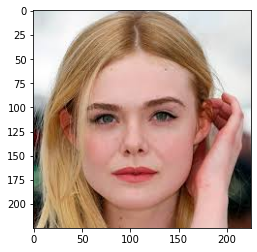

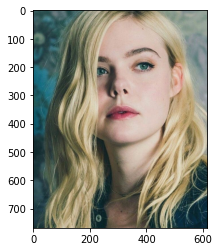

[[0.38713565]]
Different


In [44]:
one_shot_learning_task()

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()